# Setup

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
    
    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, scheduler, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval, )

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.ERROR)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x1052ecf28>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x1052eb8d0>)


In [3]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule, GradientDescentLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import ConstantLearningRateScheduler

# 2 Layers


--------------------------------------------------------------------------------
learning_rate=0.01
--------------------------------------------------------------------------------


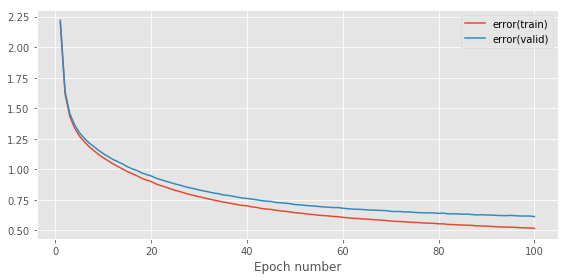

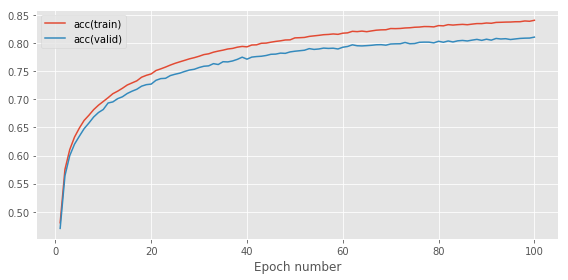

    final error(train) = 5.16e-01
    final error(valid) = 6.13e-01
    final acc(train)   = 8.41e-01
    final acc(valid)   = 8.11e-01
    run time per epoch = 4.20



--------------------------------------------------------------------------------
learning_rate=0.00
--------------------------------------------------------------------------------


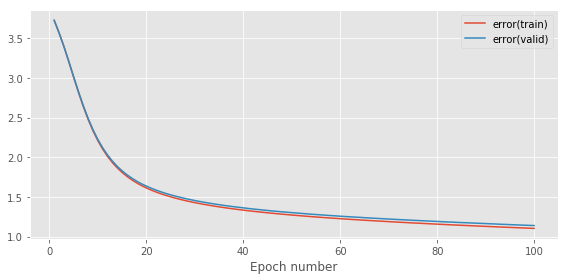

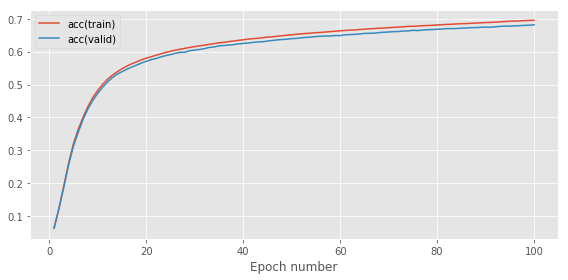

    final error(train) = 1.10e+00
    final error(valid) = 1.14e+00
    final acc(train)   = 6.95e-01
    final acc(valid)   = 6.82e-01
    run time per epoch = 3.49


In [4]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

#setup hyperparameters
num_epochs = 100
stats_interval = 1

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []
epoch_time = []
learning_rate_labels = []
number_of_layers_labels = []

learning_rates = [0.01, 0.001]
number_of_layers = [2, 3, 4, 5]

# Loop through a number of learning rates
for learning_rate in learning_rates:

    input_dim, output_dim, hidden_dim = 784, 47, 100
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()

    scheduler = ConstantLearningRateScheduler(learning_rate)

    # Use a basic gradient descent learning rule
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler, test_data, num_epochs, stats_interval, notebook=True)

    fig_1.tight_layout()
    fig_1_name = "2_fig_1_" + str(learning_rate) + ".pdf"
    fig_1.savefig(fig_1_name)
    
    fig_2.tight_layout()
    fig_2_name = "2_fig_2_" + str(learning_rate) + ".pdf"
    fig_2.savefig(fig_2_name)
    
    print('-' * 80)
    print('learning_rate={0:.2f}'
          .format(learning_rate))
    print('-' * 80)

    plt.show()

    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])
    epoch_time.append(run_time * 1. / num_epochs)
    learning_rate_labels.append(learning_rate)

# 3 Layers


--------------------------------------------------------------------------------
learning_rate=0.01
--------------------------------------------------------------------------------


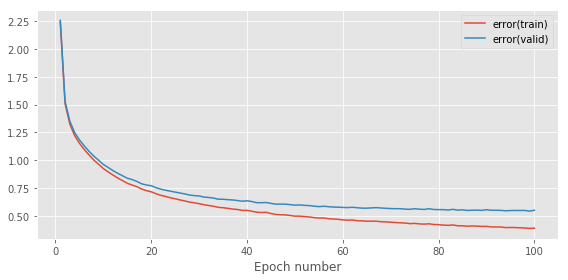

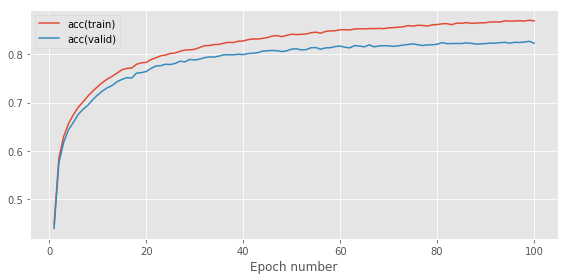

    final error(train) = 3.88e-01
    final error(valid) = 5.49e-01
    final acc(train)   = 8.69e-01
    final acc(valid)   = 8.23e-01
    run time per epoch = 4.17



--------------------------------------------------------------------------------
learning_rate=0.00
--------------------------------------------------------------------------------


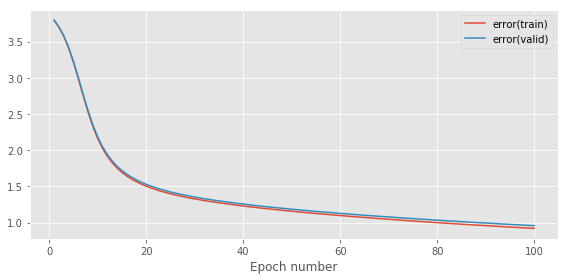

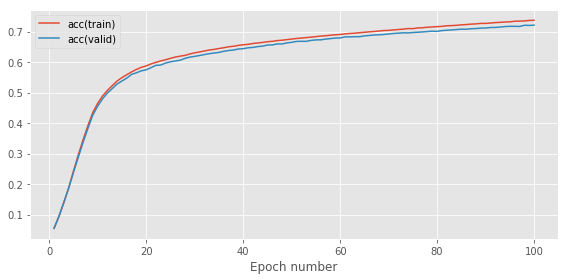

    final error(train) = 9.20e-01
    final error(valid) = 9.58e-01
    final acc(train)   = 7.37e-01
    final acc(valid)   = 7.21e-01
    run time per epoch = 4.34


In [5]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

#setup hyperparameters
num_epochs = 100
stats_interval = 1

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []
epoch_time = []
learning_rate_labels = []
number_of_layers_labels = []

learning_rates = [0.01, 0.001]
number_of_layers = [2, 3, 4, 5]

# Loop through a number of learning rates
for learning_rate in learning_rates:

    input_dim, output_dim, hidden_dim = 784, 47, 100
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
            AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
            ReluLayer(),
            AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
            ReluLayer(),
            AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
        ])

    error = CrossEntropySoftmaxError()

    scheduler = ConstantLearningRateScheduler(learning_rate)

    # Use a basic gradient descent learning rule
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler, test_data, num_epochs, stats_interval, notebook=True)

    fig_1.tight_layout()
    fig_1_name = "3_fig_1_" + str(learning_rate) + ".pdf"
    fig_1.savefig(fig_1_name)
    
    fig_2.tight_layout()
    fig_2_name = "3_fig_2_" + str(learning_rate) + ".pdf"
    fig_2.savefig(fig_2_name)
    
    print('-' * 80)
    print('learning_rate={0:.2f}'
          .format(learning_rate))
    print('-' * 80)

    plt.show()

    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])
    epoch_time.append(run_time * 1. / num_epochs)
    learning_rate_labels.append(learning_rate)

# 4 Layers


--------------------------------------------------------------------------------
learning_rate=0.01
--------------------------------------------------------------------------------


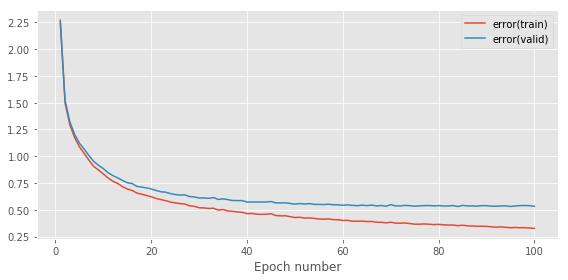

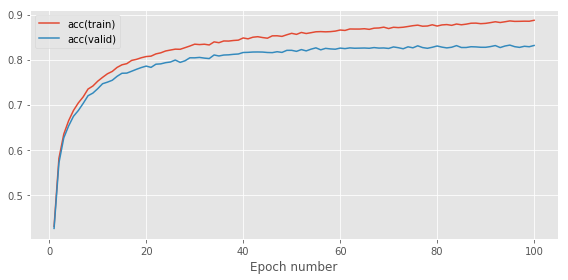

    final error(train) = 3.27e-01
    final error(valid) = 5.33e-01
    final acc(train)   = 8.87e-01
    final acc(valid)   = 8.31e-01
    run time per epoch = 5.13



--------------------------------------------------------------------------------
learning_rate=0.00
--------------------------------------------------------------------------------


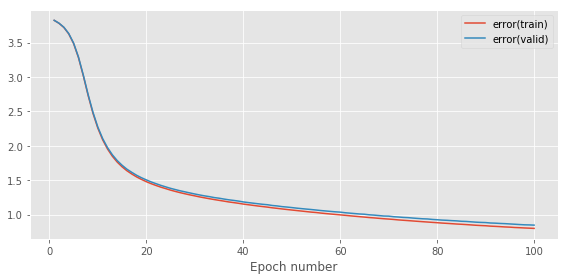

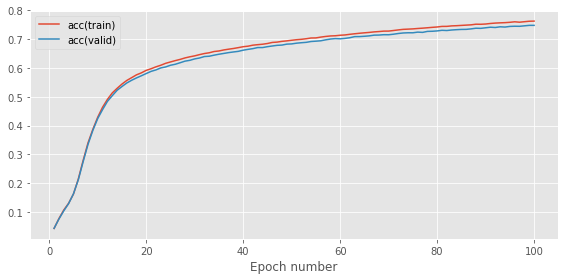

    final error(train) = 8.00e-01
    final error(valid) = 8.48e-01
    final acc(train)   = 7.63e-01
    final acc(valid)   = 7.48e-01
    run time per epoch = 5.02


In [7]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

#setup hyperparameters
num_epochs = 100
stats_interval = 1

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []
epoch_time = []
learning_rate_labels = []
number_of_layers_labels = []

learning_rates = [0.01, 0.001]
number_of_layers = [2, 3, 4, 5]

# Loop through a number of learning rates
for learning_rate in learning_rates:

    input_dim, output_dim, hidden_dim = 784, 47, 100
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
            AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
            ReluLayer(),
            AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
            ReluLayer(),
            AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
            ReluLayer(),
            AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
        ])

    error = CrossEntropySoftmaxError()

    scheduler = ConstantLearningRateScheduler(learning_rate)

    # Use a basic gradient descent learning rule
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler, test_data, num_epochs, stats_interval, notebook=True)

    fig_1.tight_layout()
    fig_1_name = "4_fig_1_" + str(learning_rate) + ".pdf"
    fig_1.savefig(fig_1_name)
    
    fig_2.tight_layout()
    fig_2_name = "4_fig_2_" + str(learning_rate) + ".pdf"
    fig_2.savefig(fig_2_name)
    
    print('-' * 80)
    print('learning_rate={0:.2f}'
          .format(learning_rate))
    print('-' * 80)

    plt.show()

    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])
    epoch_time.append(run_time * 1. / num_epochs)
    learning_rate_labels.append(learning_rate)

# 5 Layers


--------------------------------------------------------------------------------
learning_rate=0.01
--------------------------------------------------------------------------------


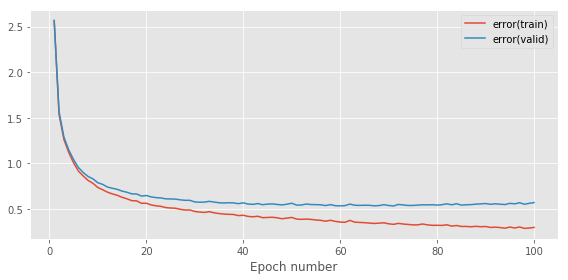

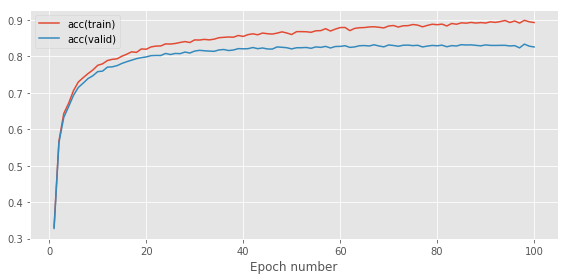

    final error(train) = 2.97e-01
    final error(valid) = 5.69e-01
    final acc(train)   = 8.93e-01
    final acc(valid)   = 8.26e-01
    run time per epoch = 5.72



--------------------------------------------------------------------------------
learning_rate=0.00
--------------------------------------------------------------------------------


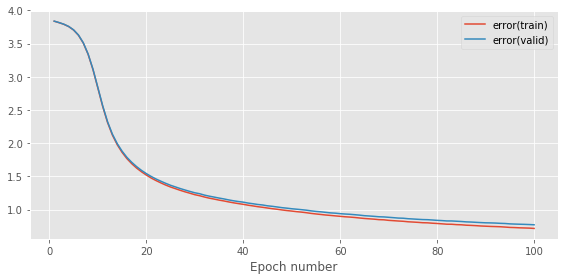

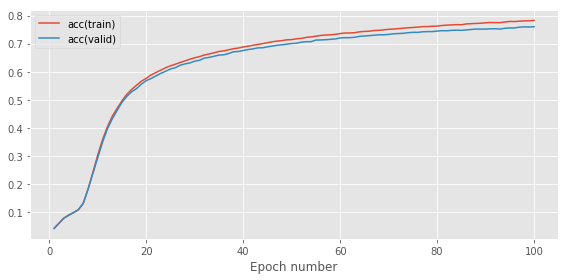

    final error(train) = 7.17e-01
    final error(valid) = 7.72e-01
    final acc(train)   = 7.83e-01
    final acc(valid)   = 7.61e-01
    run time per epoch = 5.63


In [8]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

#setup hyperparameters
num_epochs = 100
stats_interval = 1

final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []
epoch_time = []
learning_rate_labels = []
number_of_layers_labels = []

learning_rates = [0.01, 0.001]
number_of_layers = [2, 3, 4, 5]

# Loop through a number of learning rates
for learning_rate in learning_rates:

    input_dim, output_dim, hidden_dim = 784, 47, 100
    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
            AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
            ReluLayer(),
            AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
            ReluLayer(),
            AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
            ReluLayer(),
            AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
            ReluLayer(),
            AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
        ])

    error = CrossEntropySoftmaxError()

    scheduler = ConstantLearningRateScheduler(learning_rate)

    # Use a basic gradient descent learning rule
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler, test_data, num_epochs, stats_interval, notebook=True)

    fig_1.tight_layout()
    fig_1_name = "5_fig_1_" + str(learning_rate) + ".pdf"
    fig_1.savefig(fig_1_name)
    
    fig_2.tight_layout()
    fig_2_name = "5_fig_2_" + str(learning_rate) + ".pdf"
    fig_2.savefig(fig_2_name)
    
    print('-' * 80)
    print('learning_rate={0:.2f}'
          .format(learning_rate))
    print('-' * 80)

    plt.show()

    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

    final_errors_train.append(stats[-1, keys['error(train)']])
    final_errors_valid.append(stats[-1, keys['error(valid)']])
    final_accs_train.append(stats[-1, keys['acc(train)']])
    final_accs_valid.append(stats[-1, keys['acc(valid)']])
    epoch_time.append(run_time * 1. / num_epochs)
    learning_rate_labels.append(learning_rate)